# PEiAR Laboratorium 14

## Zad.1 (Test proporcji – c. d.)

Na pewnym egzaminie wstępnym spośród 705 absolwentów techników 450 nie rozwiązało pewne-
go zadania, natomiast spośród 1320 absolwentów liceów nie rozwiązało tego zadania 517 kandyda-
tów.
Zweryfikuj hipotezę H0 : θ1 = θ2 wobec H1 : ~H0, gdzie θ oznacza frakcję absolwentów przygoto-
wanych do rozwiązania tego typu zadania.


In [2]:
prop.test(c(255, 803), c(705, 1320))



	2-sample test for equality of proportions with continuity correction

data:  c(255, 803) out of c(705, 1320)
X-squared = 111.05, df = 1, p-value < 2.2e-16
alternative hypothesis: two.sided
95 percent confidence interval:
 -0.2918938 -0.2013686
sample estimates:
   prop 1    prop 2 
0.3617021 0.6083333 


## Zad.2

Sprawdzono 4 partie żarówek, każda po 1000 sztuk i otrzymano następujące informacje o brakach:
braki=c(24,34,22,42). Zweryfikować hipotezę H0 : θ1 = θ2 = θ3 = θ4 wobec H1 : H∼ 0 , gdzie θi jest
frakcją poprawnie działających sztuk .


In [3]:
prop.test(c(976, 966, 978, 958), rep(1000, 4))



	4-sample test for equality of proportions without continuity correction

data:  c(976, 966, 978, 958) out of rep(1000, 4)
X-squared = 8.759, df = 3, p-value = 0.03267
alternative hypothesis: two.sided
sample estimates:
prop 1 prop 2 prop 3 prop 4 
 0.976  0.966  0.978  0.958 


## Zad.3 (Przedziały ufności)

Napisz funkcję puNorm(n, k, m, s), która dla zadanych parametrów generuje n próbek k -elemento-
wych i rysuje przedziały ufności dla każdej próbki (chodzi o przedziały ufności dla nieznanego pa-
rametru wartości oczekiwanej).
Liczby generowane są z rozkładu normalnego o średniej m i odchyleniu standardowym s.
Sprawdź działanie funkcji dla n = 50, m = 100, s = 16 oraz
(a) k = 9
(b) k = 15
(c) k = 30
(d) k = 90.
Wskazówka.: użyj dedykowanej do ilustrowania przedziałów ufności funkcji
plotCI(
wektor od 1 do liczba_próbek,
wektor obliczonych na podstawie prób wartości estymowanego parametru,

```
ui = ..wektor górnych krańców przedziałów ufności..,
li = ..wektor dolnych krańców przedziałów ufności..,
las = 1,
xlab =’...’,
ylab =’...’,
ylim =c(m – 2*s, m + 2*s),
main = ‘...’,
xaxt=’n’)
```

z paczki `plotrix` lub `gplots`.
Co możemy regulować dodatkowym atrybutem sfrac przyjmującym ułamkowe wartości numeryczne?

Przedział ufności: `x-t(1-alfa/2, n-1)*S*/sqrt(n-1) < mi < x+t(1-alfa/2, n-1)*S*/sqrt(n-1)`
x-średnia, y-kwantyl(t(1-alfa)...)

### Przeedziały ufności dla nieznanego parametru na poziomie istotności alfa

Krańce przedziału ufności są zmiannymi losowymi. Prawdopodobieństwo, że parametr jest pokryty przedmiałem ufności musi być >= 1-alfa

Liczy już poprawione odchylenie


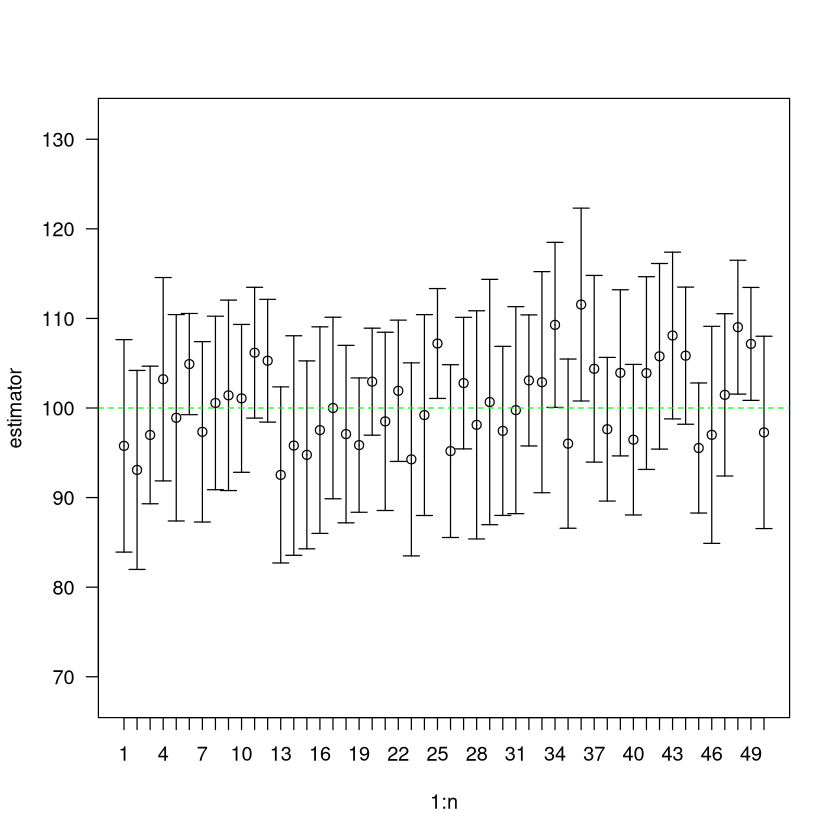

In [13]:
library(plotrix)
puNorm <- function(n, k, m, s) {
  lower <- c()
  upper <- c()
  estimator <- c()
  for (i in 1:n) {
    smpl <- rnorm(k, mean = m, sd = s)
    x <- mean(smpl)
    y <- qt(0.975, df = k - 1) * sd(smpl / sqrt(k - 1))
    lower[i] <- x - y
    upper[i] <- x + y
    estimator[i] <- x
  }
  plotCI(1:n, estimator,
    ui = upper, li = lower, las = 1,
    ylim = c(m - 2 * s, m + 2 * s), xaxt = 'n'
  )
  axis(side = 1, at = 1:50)
  abline(h = m, lty = 2, col = 'green')
}
puNorm(50, 15, 100, 16)


## Zad.4 (Analiza wariancji → testy istotności dla wielu średnich..)

Zmierzono czas ułożenia kostki Rubika w grupach reprezentantów Polski, Niemiec, USA i Norwegii i otrzymano wyniki (w sekundach):  
Polska: 23.5, 25, 24, 27, 29, 22.5, 28, 30.5, 31  
Niemcy: 22, 24.5, 23.5, 28, 32, 30.5, 29.5  
USA: 28, 26.5, 24, 25.5, 23.5, 29, 30.5, 26, 26, 32.5  
Norwegia: 25, 26.5, 30, 27, 24.5, 25, 23, 30, 29.5  
Utwórz najpierw ramkę danych z dwoma kolumnami: połączone czasy reprezentantów czterech
krajów oraz flagi (nazwa kraju).
Następnie narysuj wykresy pudełkowe konfrontujące rozkłady w próbach, tym razem przy użyciu
paczki ggplot2.
`qplot( flagi z ramki , wartości z ramki, data = ..nazwa ramki.., geom = ‘boxplot’, fill = ..nazwa kolumny z flagami..)`
Sprawdź, czy możemy (na standardowym poziomie ufności) przyjąć, że wariancje w rozkładach z
których pochodzą próby są równe. Jakiego testu użyjesz?
Dalej, pod zmienną analiza zapisz wynik analizy wariancji (analysis of variance) wykonany przy
użyciu polecenia aov(..wektor z wynikami.. ~ ..wektor z flagami.., data = ..ramka danych..).
Wykonaj podsumowanie dla uzyskanej analizy wariancji (przy użyciu polecenia summary(...)) i od-
czytaj z niego wartość F-value.
Czy możemy przyjąć hipotezę H0 o równości wartości oczekiwanych?
### Testy istotności dla wielu średnich (k >= 3)
H0: u1=u2=...=uk  
H1: ~H0

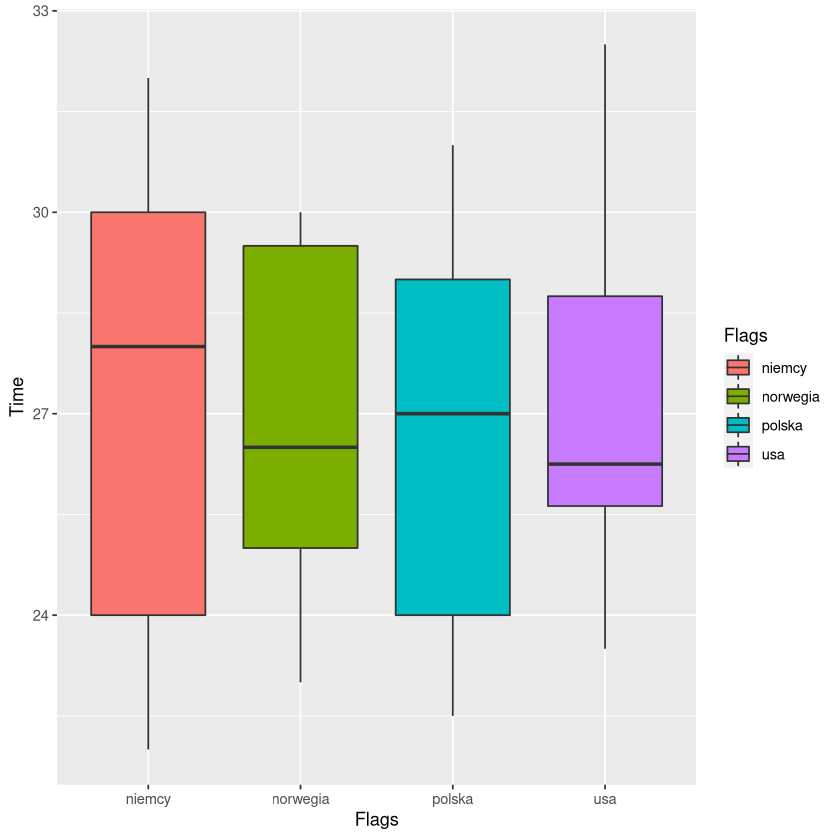

In [21]:
library(ggplot2)

polska <- c(23.5, 25, 24, 27, 29, 22.5, 28, 30.5, 31)
niemcy <- c(22, 24.5, 23.5, 28, 32, 30.5, 29.5)
usa <- c(28, 26.5, 24, 25.5, 23.5, 29, 30.5, 26, 26, 32.5)
norwegia <- c(25, 26.5, 30, 27, 24.5, 25, 23, 30, 29.5)
frame <- data.frame('Time' = c(polska, niemcy, usa, norwegia),
  'Flags' = c(rep('polska', length(polska)), rep('niemcy', length(niemcy)),
  rep('usa', length(usa)), rep('norwegia', length(norwegia))))

qplot(Flags, Time, data = frame, geom = 'boxplot', fill = Flags)

In [25]:
analiza <- aov(Time ~ Flags, data = frame)
summary(analiza)
pairwise.t.test(frame$Time, frame$Flags, p.adjust.method = p.adjust.methods)

            Df Sum Sq Mean Sq F value Pr(>F)
Flags        3   1.58   0.526   0.056  0.982
Residuals   31 292.99   9.451               


	Pairwise comparisons using t tests with pooled SD 

data:  frame$Time and frame$Flags 

         niemcy norwegia polska
norwegia 1      -        -     
polska   1      1        -     
usa      1      1        1     

P value adjustment method: holm 

# Zad.5

Przeprowadź analizę wariancji dla prób:  
I: 24, 56, 34, 25, 42, 20, 68, 53, 34  
II: 35, 76, 56, 44, 38, 25, 51, 36, 72, 29, 33  
III: 40, 51, 63, 39, 54, 49, 50, 62  
IV: 50, 80, 38, 48, 58, 74, 75, 49, 83  
V: 40, 80, 44, 75, 64, 65, 37, 61, 38, 47, 55, 29  
i zweryfikuj hipotezę H0 o równości wartości oczekiwanych w rozkładach badanej cechy we
wszystkich populacjach.
W przypadku odrzucenia hipotezy podstawowej, zastosuj test porównań wielokrotnych
pairwise.t.test() i na podstawie jego wyniku oceń w przypadku których dwóch prób, średnie nie
okazują się być równe (na standardowym poziomie ufności)
`pairwise.t.test(połączone wyniki, flagi, p.adjust.method = p.adjust.methods)`,
Odp: 1 i 4


# Zad.6

Firma transportowa przetestowała 4 rodzaje opon na sześciu podobnych ciężarówkach w losowych
momentach czasu. Każda z ciężarówek miała możliwość jazdy na każdym z typów opon. Żywot-
ność opon wyrażoną w tysiącach przejechanych kilometrów przedstawia poniższa tabela:
Typ 1 33 38 36 40 31 35
Typ 2 32 40 42 38 30 34
Typ 3 31 37 35 33 34 30
Typ 4 29 34 32 30 33 31
Wykorzystując analizę wariancji sprawdź, czy istnieją istotne różnice pomiędzy rodzajem opon a
ich żywotnością.
